# Garimpagem de Dados

## Aula 4 - Exercídio de Classificação com kNN

13/10/2017

**Dataset:** Titanic: Machine Learning from Disaster

https://www.kaggle.com/c/titanic/data

Partindo da aula passada:

1. Atualizar a função que mede a distância euclidiana para o pacote do scikit-learn 

2. Implementar uma função que selecione os k vizinhos mais próximos (k > 1)

3. Implementar uma função que recebe os k vizinhos mais próximos e determinar a classe correta

4. Transformar as features categoricas em numéricas (tip: pandas ou scikit-learn)

5. Analisar a necessidade de normalizar as features numéricas (tip: pandas ou scikit-learn)

6. Selecionar as features baseada na correlação (tip: pandas)

7. Separar o dataset em treino (75%) / teste (25%) / validação (10% do treino)

4. Execute o classificador para 30 k's pulando de 4 em 4 e apresente todas as acurácias utilizando o dataset de validação (Qual o melhor k?) [plotar um gráfico com os resultados]

5. Executar o classificador para o melhor k encontrado utilizando o dataset de teste e apresentar um relatório da precisão (tip: scikit-learn) [plotar um gráfico com os resultados]

In [1]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
#Classificador KNN
class KNNClassifier(object):
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.k = None

    def euc_distance(self, a, b):
        return euclidean_distances([a],[b])[0][0]
    
    def closest(self, row):
        dists = []
        y = []
        #Cálcula a distancia entre o elemento e todos os outros do conjunto de treino
        for element in self.X_train:
            dists.append(self.euc_distance(row,element))
        #Pega os índices em ordem crescente das menores distancias
        idx = np.argsort(dists)
        #Separa os índices do número de k desejado
        k_idx = idx[0:self.k]
        #Pega o target dos elementos
        for i in k_idx:
            y.append(self.y_train[i])
        #Calcula os elementos únicos no target (w[0]) e número de ocorrências (w[1])
        w = np.unique(y, return_counts = True)  
        target_values = w[0]
        #Retorna o target com o maior número de ocorrências (moda)
        return target_values[np.argmax(w[1])]

    def fit(self, training_data, training_labels,k):
        self.X_train = training_data
        self.y_train = training_labels
        self.k = k

    def predict(self, to_classify):
        predictions = []
        for row in to_classify:
            label = self.closest(row)
            predictions.append(label)
        return predictions

In [3]:
# Carregando os dados dos arquivos
data_train = pd.read_csv("train.csv")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Transformar as features categoricas em numéricas
map_sex = pd.factorize(data_train['Sex'])
map_embarked = pd.factorize(data_train['Embarked'])
map_cabin = pd.factorize(data_train['Cabin'])

#Transformaos dados faltantes de idade na média de idade do gênero da pessoa
for i in map_sex[1]:
    index = (data_train['Sex'] == i)
    data_train.loc[index,['Age']] = data_train[index].Age.fillna(data_train[index].Age.mean())
    
data_train['Sex'] = map_sex[0]
data_train['Embarked'] = map_embarked[0]
data_train['Cabin'] = map_cabin[0]

In [5]:
# Remove os atributos 'Name' e 'Ticket' pois não parecem prover nenhuma informação relevante. 
# Remove 'Cabin' por ter muitos dados faltantes
data_train.drop(labels=['Name','Ticket','Cabin'], inplace=True, axis=1)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [6]:
#Separa os dados em features e class
X_train = data_train.loc[:,'Pclass':]
y_train = data_train['Survived']

#Matriz de Correlação
cor = X_train.corr()
cor

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,-0.131900,-0.330391,0.083081,0.018443,-0.549500,0.050992
Sex,-0.131900,1.000000,-0.103236,0.114631,0.245489,0.182333,0.111249
Age,-0.330391,-0.103236,1.000000,-0.236920,-0.182556,0.089079,-0.003574
SibSp,0.083081,0.114631,-0.236920,1.000000,0.414838,0.159651,-0.058008
Parch,0.018443,0.245489,-0.182556,0.414838,1.000000,0.216225,-0.076625
Fare,-0.549500,0.182333,0.089079,0.159651,0.216225,1.000000,0.058462
Embarked,0.050992,0.111249,-0.003574,-0.058008,-0.076625,0.058462,1.000000


In [7]:
#Normaliza as features
X_normalized = preprocessing.MinMaxScaler().fit_transform(X_train)

#Separa os dados em treino e teste e validação
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y_train.values.flatten(), test_size=0.25)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.10)

In [9]:
ks = np.arange(1, 120, 4)
result = []
for k in ks:    
    knn = KNNClassifier()
    knn.fit(X_train,y_train,k)
    predict = knn.predict(X_val)
    result.append([(sum(y_val == predict)/y_val.shape[0]), k])

In [10]:
best_result,best_k = max(result)
print('O melhor resultado foi {} com o k = {} '.format(best_result,best_k))

O melhor resultado foi 0.835820895522388 com o k = 97 


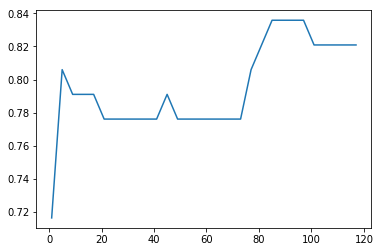

In [11]:
result = np.asarray(result)
plt.plot(result[:,1],result[:,0])
plt.show()

In [12]:
# Teste do melhor K
knn.fit(X_train,y_train,best_k)
predict = knn.predict(X_test)
# Relatorio dos testes
print(classification_report(y_test, predict, target_names=['Survived', 'Not Survived']))

              precision    recall  f1-score   support

    Survived       0.85      0.89      0.87       146
Not Survived       0.77      0.70      0.73        77

 avg / total       0.82      0.83      0.82       223

